<a href="https://colab.research.google.com/github/toluwee/Machine_Learning_Projects/blob/master/Regression_Algo_Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Stuff

### Import Libraries


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

from scipy.stats import uniform
from scipy.stats import randint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras


### Load Dataset

In [ ]:
filepath = 'G:/My Drive/RheoCompareML/AppVis_Fu2.csv'
dataset = pd.read_csv(filepath)

# Descriptive Statistics

In [ ]:

# shape
dataset.shape

(262, 6)

In [ ]:
#@title
# head
dataset.tail(5)

,temp,np_conc,salinity,foam_qual,shear,app_vis
257,68,0.5,0.05,0.7,4400,3.23
258,69,0.5,0.05,0.7,4400,3.21
259,70,0.5,0.05,0.7,4400,3.16
260,71,0.5,0.05,0.7,4400,3.14
261,72,0.5,0.05,0.7,4400,3.14


In [ ]:
# dataset = dataset.drop(['temp' ],axis =1)

In [ ]:
# dataset = dataset.iloc[:, 0:5].copy()

In [ ]:
# header = ['flow_rate','temp','np_conc','salinity','foam_qual', 'app_vis']
# dataset.columns = header

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset = dataset.dropna( how='all', axis=1)

In [ ]:
pd.set_option('precision', 2)
dataset.agg(['mean','min', 'max', 'std'])

,temp,np_conc,salinity,foam_qual,shear,app_vis
mean,25.26,0.47,5.07e-02,0.60,3227.09,12.08
min,20.00,0.05,3.00e-02,0.10,1338.00,2.63
max,72.00,0.70,1.10e-01,0.90,4400.00,34.54
std,12.53,0.11,6.03e-03,0.21,723.86,5.38


In [ ]:
#types
dataset.dtypes

temp           int64
np_conc      float64
salinity     float64
foam_qual    float64
shear          int64
app_vis      float64
dtype: object

# Data Visualizations

## Univariate Plots

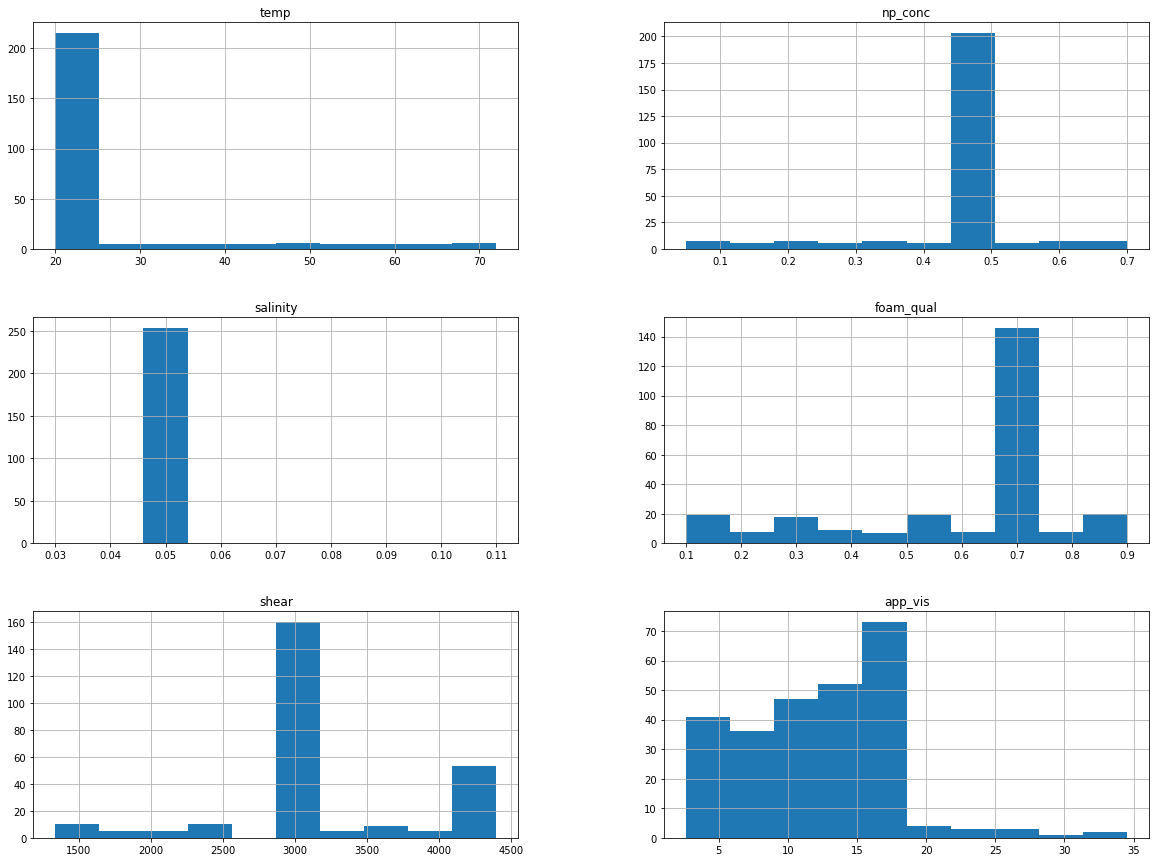

In [ ]:
#histogram
dataset.hist(figsize=(20,15))
plt.show()

###### Observations from histogram
1. Different scales observed

2. A lot of the distributions are skewed including the target features


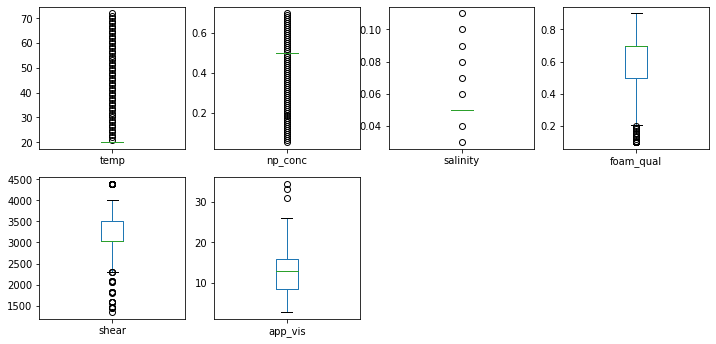

In [ ]:
#box and whisker plots
dataset.plot(kind='box', subplots=True, layout = (4,4), sharex= False, sharey = False, figsize = (12,12))
plt.show()

1. Attributes are seen to have quite different spreads. 
2. Also, data skewness more obvious with most data showing up as outliers

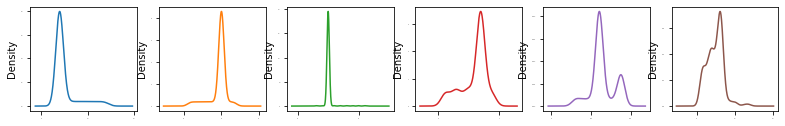

In [ ]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1, figsize = (18,18))
plt.show()

Many of the attributes have a skewed distribution and some bimodal and trimodal. For predictive model, we will have to apply transform to make these distribution more Gaussian. 



## Multivariate Plots

In [ ]:
# Correlation Matrix
corr_matrix = dataset.corr().abs()
corr_matrix.style.background_gradient()

,temp,np_conc,salinity,foam_qual,shear,app_vis
temp,1.00,0.12,0.05,0.21,0.68,0.54
np_conc,0.12,1.00,0.03,0.14,0.08,0.08
salinity,0.05,0.03,1.00,0.06,0.03,0.45
foam_qual,0.21,0.14,0.06,1.00,0.24,0.09
shear,0.68,0.08,0.03,0.24,1.00,0.16
app_vis,0.54,0.08,0.45,0.09,0.16,1.00


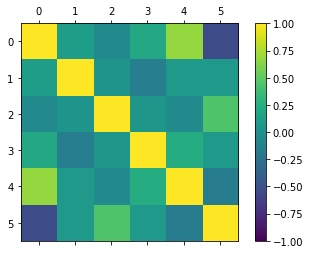

In [ ]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

# Create Test Dataset

In [ ]:
# Seperate output and input variables
target = ["app_vis"]
# target_1 = ["app_vis", "MRF"]

X,y = dataset.drop(target, axis=1), dataset[target]

In [ ]:
# seperate training and test data 
train_X, test_X, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)


# Preprocessing


In [ ]:
from sklearn.preprocessing import RobustScaler
# Check best data transform
minmax = MinMaxScaler()
scaler = StandardScaler()
power = RobustScaler()


X_train_ANN = minmax.fit_transform(train_X)
X_train = scaler.fit_transform(train_X)
X_train_AN = power.fit_transform(train_X)

In [ ]:
#Apply transformation to test set
X_test_ANN = minmax.transform(test_X)
X_test = scaler.transform(test_X)
X_test_AN = power.transform(test_X)

In [ ]:
y_train_ANN = y_train.values.ravel()
y_test_ANN = y_test.values.ravel()

In [ ]:
y_train = y_train
y_test = y_test

# Define Utilities

In [ ]:
# Create function to evaluate model

def evaluate_model(model, X, y, scoring, cv):
  # evaluate the model with cross-validation and mean squareed error
  scores = cross_val_score(estimator=model, X=X, y=y, 
                           scoring= scoring, cv=cv,
                           n_jobs = -1)
  # Force positive output
  scores = np.abs(scores)
  # Output the result
  print("MSE: ", scores.mean(), "(", scores.std(), ")")

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'
cv = RepeatedKFold(n_splits=num_folds, random_state=seed)


# re

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)


In [ ]:
# define the base model
model_PolyLR = LinearRegression()

# evaluate model
evaluate_model(model_PolyLR, X_train_poly, y_train,scoring, cv)

MSE:  0.572641888311061 ( 0.3910990299323363 )


## Fine-tune Algorithm

In [ ]:
# # define the base model
# model = SVR() 

# # define hyperparameter values
# param_dist = {
#     # "kernel": ['linear', 'sigmoid','poly', 'rbf', ],
#     "kernel": ['rbf', ],
#     'C' : randint(1, 100),
#     'gamma' : uniform(0.01,1.5)
#     }

# # Implement randomized search on hyper parameters
# rnd_search = RandomizedSearchCV(estimator= model, param_distributions=param_dist,cv=cv,
#                            scoring=scoring, return_train_score=True, random_state = seed,
#                            verbose =2, n_jobs=-1)

# # Fit to training dataset
# rnd_search.fit (X_train, y_train_ANN)

# rnd_search.best_params_

In [ ]:
# # Define base model
# model_SVR =rnd_search.best_estimator_

# # evaluate model
# evaluate_model(model_SVR, X_train, y_train_ANN, scoring, cv)

In [ ]:
# Fit the model on the training set and time the execution
fitted_PolyLR = model_PolyLR.fit(X_train, y_train_ANN)

#predict using training data
PolyLR_pred_train = fitted_PolyLR.predict(X_train)

In [ ]:
#predict using test data
PolyLR_pred = fitted_PolyLR.predict(X_test)


## Plot Predicted vs Measured

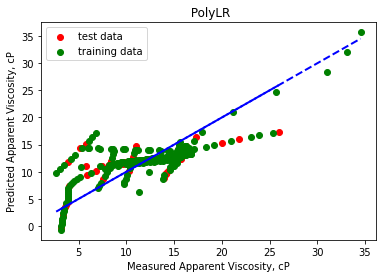

In [ ]:
# Plot predicted vs Measured for Apparent Viscosity
predicted = PolyLR_pred_train
predicted2 = PolyLR_pred

fig, ax = plt.subplots()
ax.scatter(y_test, predicted2 , c='red', label ='test data ')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)

ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b--', lw=2)

ax.set_title (' PolyLR')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')
ax.legend(loc= 'upper left')
plt.show()

# SVR

In [ ]:

# define the base model
model = SVR()

# evaluate model
evaluate_model(model, X_train, y_train_ANN,scoring, cv)

MSE:  13.517365668295335 ( 10.991459578822113 )


## Fine-tune Algorithm

In [ ]:
# define the base model
model = SVR() 

# define hyperparameter values
param_dist = {
    # "kernel": ['linear', 'sigmoid','poly', 'rbf', ],
    "kernel": ['rbf', ],
    'C' : randint(1, 100),
    'gamma' : uniform(0.01,1.5)
    }

# Implement randomized search on hyper parameters
rnd_search = RandomizedSearchCV(estimator= model, param_distributions=param_dist,cv=cv,
                           scoring=scoring, return_train_score=True, random_state = seed,
                           verbose =2, n_jobs=-1)

# Fit to training dataset
rnd_search.fit (X_train, y_train_ANN)

rnd_search.best_params_

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.0s finished


{'C': 83, 'gamma': 0.15996237372700434, 'kernel': 'rbf'}

In [ ]:
# Define base model
model_SVR =rnd_search.best_estimator_

# evaluate model
evaluate_model(model_SVR, X_train, y_train_ANN, scoring, cv)

MSE:  0.7444191456534022 ( 1.2347357237153649 )


In [ ]:
# Fit the model on the training set and time the execution
fitted_SVR = model_SVR.fit(X_train, y_train_ANN)

#predict using training data
SVR_pred_train = fitted_SVR.predict(X_train)

In [ ]:
#predict using test data
SVR_pred = fitted_SVR.predict(X_test)


## Plot Predicted vs Measured

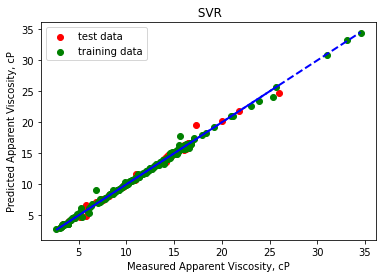

In [ ]:
# Plot predicted vs Measured for Apparent Viscosity
predicted = SVR_pred_train
predicted2 = SVR_pred

fig, ax = plt.subplots()
ax.scatter(y_test, predicted2 , c='red', label ='test data ')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)

ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b--', lw=2)

ax.set_title (' SVR')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')
ax.legend(loc= 'upper left')
plt.show()

# KNN

In [ ]:
# define the base model
model = KNeighborsRegressor()

# evaluate model
evaluate_model(model, X_train, y_train,scoring, cv)

MSE:  2.7352083619047622 ( 2.340815991454238 )


## Fine-tune Algorithm

In [ ]:
# define the base model
model = KNeighborsRegressor() 

param_dist = {
    'n_neighbors' : randint(3, 10),
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : randint(10, 100),
    'p': [1,2]

    }

rnd_search = RandomizedSearchCV(estimator= model, param_distributions=param_dist,cv=cv,
                           scoring=scoring, return_train_score=True, random_state = seed,
                           verbose =2, n_jobs=-1,)
rnd_search.fit(X_train, y_train)

rnd_search.best_params_

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    5.0s finished


{'algorithm': 'auto', 'leaf_size': 98, 'n_neighbors': 3, 'p': 1}

In [ ]:
# Define base model
model_KNN =rnd_search.best_estimator_

# evaluate model
evaluate_model(model_KNN,X_train, y_train, scoring,cv)

MSE:  1.2061428346560852 ( 0.9880995524628574 )


In [ ]:
# Fit the model on the training set

fitted_KNN = model_KNN.fit(X_train, y_train)

In [ ]:
KNN_pred_train = fitted_KNN.predict(X_train)
KNN_pred = fitted_KNN.predict(X_test)

## Plot Predicted vs Measured

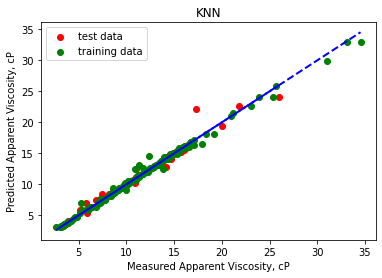

In [ ]:
# Plot predicted vs Measured for Apparent Viscosity

predicted = KNN_pred_train
predicted2 = KNN_pred

fig, ax = plt.subplots()
ax.scatter(y_test, predicted2 , c='red', label ='test data ')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)

ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b--', lw=2)

ax.set_title ('KNN')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')
ax.legend(loc= 'upper left')
plt.show()

# CART

In [ ]:
# define the base model
model = DecisionTreeRegressor()

# wrapper = MultiOutputRegressor(model)
evaluate_model(model, X_train, y_train_ANN,scoring, cv)

MSE:  0.5735676559523811 ( 0.4368633496798209 )


## Fine-tune Algorithm

In [ ]:
# define the base model
model = DecisionTreeRegressor(random_state= 42,) 

param_dist = {
    "max_depth": randint(2, 10),
    "min_samples_split": randint(2, 10),
    'min_samples_leaf' : randint(1, 10),
    'max_features' : ["auto", "sqrt", "log2"],
    "max_leaf_nodes": randint(2, 100),

    }

rnd_search = RandomizedSearchCV(estimator= model, param_distributions=param_dist,cv=cv,
                           scoring=scoring, return_train_score=True, random_state = seed,
                           verbose =2, n_jobs=-1,)
rnd_search.fit(X_train, y_train_ANN)

rnd_search.best_params_

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 61,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [ ]:
# Define model
model_CART =rnd_search.best_estimator_

# evaluate model
evaluate_model(model_CART,X_train, y_train_ANN, scoring,cv)

MSE:  4.65894940601171 ( 3.048474160084756 )


In [ ]:
# Fit the model on the training set

fitted_CART = model_CART.fit(X_train, y_train_ANN)


In [ ]:
CART_pred_train = fitted_CART.predict(X_train)
CART_pred = fitted_CART.predict(X_test)

## Plot Predicted vs Measured

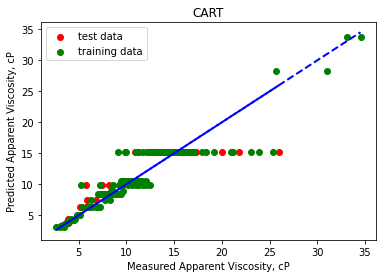

In [ ]:
# Plot predicted vs Measured for Apparent Viscosity

predicted = CART_pred_train
predicted2 = CART_pred
fig, ax = plt.subplots()
ax.scatter(y_test, predicted2 , c='red', label ='test data ')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)

ax.scatter(y_train_ANN, predicted, c= 'green', label ='training data')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b--', lw=2)

ax.set_title ('CART')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')
ax.legend(loc= 'upper left')
plt.show()

# MLPNN

# MLP-LM

In [ ]:
pip install pyrenn

  Created wheel for pyrenn: filename=pyrenn-0.1-cp37-none-any.whl size=9259 sha256=4709c6c2446bdafe651e8bc5096951af3344dde75546fc078fe44b6116003952
  Stored in directory: /root/.cache/pip/wheels/91/ed/b6/ab8600223e6ec9cea9592f0cf6e32db7abb4c2cc4c30b90eac
Successfully built pyrenn


In [ ]:
import pyrenn as prn

In [ ]:
net = prn.CreateNN([5,20,1])

net = prn.train_LM (X_train.T, y_train_ANN,net,verbose=True,
                    k_max=100,
                    E_stop=1e-5)

MLPLM_pred_train = prn.NNOut(X_train.T,net)
MLPLM_pred = prn.NNOut(X_test.T,net)

Iteration:  0 		Error:  46.3060495284191 	scale factor:  3.0
Iteration:  1 		Error:  2.0974640416833537 	scale factor:  0.3
Iteration:  2 		Error:  1.547943171092291 	scale factor:  0.03
Iteration:  3 		Error:  1.0731593166451712 	scale factor:  0.03
Iteration:  4 		Error:  0.51395539800042 	scale factor:  0.03
Iteration:  5 		Error:  0.32422001561793173 	scale factor:  0.03
Iteration:  6 		Error:  0.2278779091379518 	scale factor:  0.03
Iteration:  7 		Error:  0.17667991731784705 	scale factor:  0.03
Iteration:  8 		Error:  0.1495835963012141 	scale factor:  0.03
Iteration:  9 		Error:  0.13229212131011925 	scale factor:  0.03
Iteration:  10 		Error:  0.1187953285475382 	scale factor:  0.03
Iteration:  11 		Error:  0.10729748210508132 	scale factor:  0.03
Iteration:  12 		Error:  0.10233995089924368 	scale factor:  0.003
Iteration:  13 		Error:  0.05018643744637326 	scale factor:  0.003
Iteration:  14 		Error:  0.041218547475776725 	scale factor:  0.003
Iteration:  15 		Error:  0.0372

## Plot Predicted vs Measured

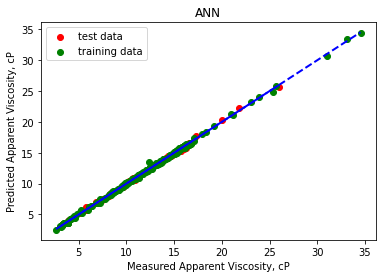

In [ ]:
# Plot predicted vs Measured for Apparent Viscosity

predicted = MLPLM_pred_train
predicted2 = MLPLM_pred

fig, ax = plt.subplots()
ax.scatter(y_test, predicted2 , c='red', label ='test data ')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)

ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b--', lw=2)

ax.set_title ('ANN')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')
ax.legend(loc= 'upper left')
plt.show()

# MLP-RMS

## Utilities

In [ ]:
# Create function to build and compile a Keras model

def build_model(n_hidden=1, n_neurons=30, learning_rate = 3e-3, input_shape = X_train.shape[1:]): # explicitly state no of features as input_shape
  model = keras.models.Sequential()
  options = {"input_shape": input_shape}

  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, kernel_initializer="he_normal",
                                 kernel_constraint=keras.constraints.max_norm(3), activation="relu", **options))
    keras.layers.Dropout(rate=0.45)
    options ={} # so that input_shape option only applies to first layer
    
    
  model.add(keras.layers.Dense(1, kernel_initializer="he_normal",
                               kernel_constraint=keras.constraints.max_norm(1.), activation="linear", **options)) #output layer

  # optimizer = keras.optimizers.SGD(learning_rate, momentum=0.9) # optimizer explicitly declared so as to be able to tweak learning rate
  optimizer = keras.optimizers.RMSprop(learning_rate)

  model.compile(loss = "mse", optimizer = optimizer) # mse represents l2 loss
  return model



## Fine-tune Algorithm

In [ ]:
# First Search to finetine model parameters

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": randint(1,5),
    "n_neurons": randint(2, 500),

}

search_result = RandomizedSearchCV(keras_reg, param_distribs, cv=cv, verbose=2, n_jobs=-1, random_state=42)
search_result.fit(X_train, y_train,
        epochs = 100, batch_size = 20,
        validation_split = 0.2,
        callbacks=[keras.callbacks.EarlyStopping(patience=10)])

model_ANN = search_result.best_estimator_



In [ ]:
model_ANN.get_params()

{'build_fn': <function __main__.build_model>, 'n_hidden': 3, 'n_neurons': 73}

In [ ]:
# Fit model with data
fitted_ANN = model_ANN.fit(X_train, y_train, epochs = 300, batch_size = 20,
         validation_split = 0.2,callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# Save the entire model as a SavedModel.
model = search_result.best_estimator_.model
# ! Be sure to mount google drive first
!mkdir -p saved_model
model.save("/content/drive/MyDrive/Colab Notebooks/saved_model/Paper2_MLPNN") 

Epoch 1/300
9/9 [==============================] - 1s 24ms/step - loss: 103.8023 - val_loss: 38.4124
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 30.9069 - val_loss: 24.6939
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 26.9653 - val_loss: 20.9197
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 26.2689 - val_loss: 16.9270
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 14.8145 - val_loss: 12.6648
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 13.1842 - val_loss: 12.9181
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 12.0468 - val_loss: 9.0899
Epoch 8/300
9/9 [==============================] - 0s 7ms/step - loss: 9.7575 - val_loss: 7.0526
Epoch 9/300
9/9 [==============================] - 0s 8ms/step - loss: 8.6741 - val_loss: 4.6255
Epoch 10/300
9/9 [==============================] - 0s 7ms/step - loss: 4.1850 - val_loss: 3.2609
Epoch 11/300
9

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
# # ... and later

# # ! Be sure to mount google drive first
# model_ANN = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/saved_model/Paper2_MLPNN")

# fitted_ANN = model_ANN.fit(X_train, y_train, epochs = 300, batch_size = 20,
#          validation_split = 0.2,callbacks=[keras.callbacks.EarlyStopping(patience=10)])

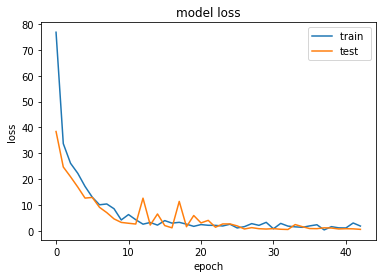

In [ ]:
# summarize history for loss
plt.plot(fitted_ANN.history[ 'loss' ])
plt.plot(fitted_ANN.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train ', 'test' ], loc= 'upper right' )
plt.show()

In [ ]:
ANN_pred_train = model_ANN.predict(X_train)
ANN_pred = model_ANN.predict(X_test)

## Plot Predicted vs Measured

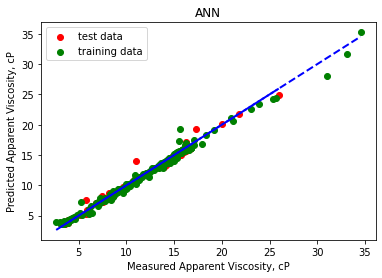

In [ ]:
# Plot predicted vs Measured for Apparent Viscosity

predicted = ANN_pred_train
predicted2 = ANN_pred

fig, ax = plt.subplots()
ax.scatter(y_test, predicted2 , c='red', label ='test data ')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)

ax.scatter(y_train, predicted, c= 'green', label ='training data')
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b--', lw=2)

ax.set_title ('ANN')
ax.set_xlabel('Measured Apparent Viscosity, cP')
ax.set_ylabel('Predicted Apparent Viscosity, cP')
ax.legend(loc= 'upper left')
plt.show()

# Evaluate Algorithms

## MSE 

In [ ]:
# Compare Models using MSE for train set
models_train =[]


models_train.append(('CART', CART_pred_train))
models_train.append(('KNN', KNN_pred_train))
models_train.append(('SVR', SVR_pred_train)) # The Multioutput wrapper for SVR
models_train.append(('MLPLM', MLPLM_pred_train))
models_train.append(('MLPNN', ANN_pred_train))

# Evaluate each model in turn
results = []
names = []

for name, predict_valu in models_train:
    cv_results = mean_squared_error(y_train_ANN, predict_valu)
    cv_results = np.abs(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name,":", "MSE:", cv_results)


CART : MSE: 3.5139500079015478
KNN : MSE: 0.14479914938862307
SVR : MSE: 0.10198034147018858
MLPLM : MSE: 0.02859926600647069
MLPNN : MSE: 0.31038513998223866


The SVR has the lowest error

In [ ]:
# Compare Models using MSE for test set
models_test =[]

models_test.append(('CART', CART_pred))
models_test.append(('KNN', KNN_pred))
models_test.append(('SVR', SVR_pred)) # The Multioutput wrapper for SVR
models_test.append(('MLPLM', MLPLM_pred))
models_test.append(('MLPNN', ANN_pred))

# Evaluate each model in turn
results = []
names = []

for name, predict_val in models_test:
    cv_results = mean_squared_error(y_test, predict_val,multioutput='raw_values')
    cv_results = np.abs(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name,":", "MSE:", cv_results)


CART : MSE: [4.80628576]
KNN : MSE: [0.71966184]
SVR : MSE: [0.20351225]
MLPLM : MSE: [0.03487725]
MLPNN : MSE: [0.47409865]


## RMSE

In [ ]:
# Compare Models using MSE for train set

results = []
names = []

for name, predict_valu in models_train:
    cv_results = mean_squared_error(y_train, predict_valu,multioutput='raw_values')
    cv_results = np.abs(cv_results)
    cv_results = np.sqrt(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name,":", "RMSE:", cv_results)


CART : RMSE: [1.87455328]
KNN : RMSE: [0.38052483]
SVR : RMSE: [0.31934361]
MLPLM : RMSE: [0.16911318]
MLPNN : RMSE: [0.55712219]


In [ ]:
# Compare Models using RMSE for test set
results = []
names = []

for name, predict_val in models_test:
    cv_results = mean_squared_error(y_test, predict_val,multioutput='raw_values')
    cv_results = np.abs(cv_results)
    cv_results = np.sqrt(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name,":", "RMSE:", cv_results)


CART : RMSE: [2.19232428]
KNN : RMSE: [0.84832885]
SVR : RMSE: [0.45112332]
MLPLM : RMSE: [0.18675451]
MLPNN : RMSE: [0.68854822]


SVR has the lowest  MSE

Next, Box and Whisker plots are created to visually compare the performances of the algorithms

In [ ]:
# # Compare Algorithms
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

The SVR has the lowest error

## MAE

In [ ]:
# # Compare Models using MAE for training set
# results = []
# names = []

# scoring = 'neg_mean_absolute_error'
# for name, model in models_train:
#   if name == 'ANN':
#     cv_results = cross_val_score(model, X_train_ANN, y_train, cv = cv, scoring=scoring, n_jobs = -1)
#   else:
#     cv_results = cross_val_score(model, X_train, y_train, cv = cv, scoring=scoring, n_jobs = -1)
 
#   cv_results = np.abs(cv_results)
#   results.append(cv_results)
#   names.append(name)
#   print(name,":", "MAE:", cv_results.mean(), "STD:", cv_results.std())

SVR has the lowest  MAE

In [ ]:
# Compare Models using MAE for training set

results_val = []
names = []
print('Name    Metric     AppVis       MRF  ')
print('-'*40)
for name, predict_valu in models_train:
    cv_results = mean_absolute_error(y_train, predict_valu,multioutput='raw_values')
    cv_results = np.abs(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name,":", "MAE:", cv_results)

Name    Metric     AppVis       MRF  
----------------------------------------
CART : MAE: [1.1189915]
KNN : MAE: [0.17059011]
SVR : MAE: [0.16673283]
MLPLM : MAE: [0.12070366]
MLPNN : MAE: [0.35971505]


In [ ]:
# Compare Models using MAE for test set

results_val = []
names = []
print('Name    Metric     AppVis       MRF  ')
print('-'*40)
for name, predict_val in models_test:
    cv_results = mean_absolute_error(y_test, predict_val,multioutput='raw_values')
    cv_results = np.abs(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name,":", "MAE:", cv_results)

Name    Metric     AppVis       MRF  
----------------------------------------
CART : MAE: [1.21492013]
KNN : MAE: [0.39830189]
SVR : MAE: [0.24505496]
MLPLM : MAE: [0.13170186]
MLPNN : MAE: [0.43843496]


Next, Box and Whisker plots are created to visually compare the performances of the algorithms

In [ ]:
# # Compare Algorithms
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison Using MAE')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

## R SQUARED

SVR has the highest R-squared score

In [ ]:
# Compare Models using R-squared for training set

results = []
names = []
print('Name    Metric     AppVis       MRF  ')
print('-'*40)
for name, predict_valu in models_train:
    cv_results = r2_score(y_train, predict_valu)
    # cv_results = np.abs(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name,":", "R-squared:", cv_results)

Name    Metric     AppVis       MRF  
----------------------------------------
CART : R-squared: 0.8784044234709534
KNN : R-squared: 0.9949894176037696
SVR : R-squared: 0.9964711056253467
MLPLM : R-squared: 0.9990103603550009
MLPNN : R-squared: 0.9892595341546343


In [ ]:
# Compare Models using R-squared for test set

results = []
names = []
print('Name    Metric     AppVis')
print('-'*30)
for name, predict_val in models_test:
    cv_results = r2_score(y_test, predict_val)
    # cv_results = np.abs(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name,":", "R-squared:", cv_results)

Name    Metric     AppVis
------------------------------
CART : R-squared: 0.8302358741729599
KNN : R-squared: 0.9745806283359996
SVR : R-squared: 0.9928116885032501
MLPLM : R-squared: 0.99876809131281
MLPNN : R-squared: 0.9832542325646471


## Execution Time

# Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(model_KNN, X_train, y_train,
                                 scoring='neg_mean_squared_error',
                                 n_repeats=10, n_jobs=-1, random_state=42)
# get importance
feature_importance = results.importances_mean
sorted_feat= sorted(zip(feature_importance, train_X), reverse=True)
# Create two lists from the list of tuples created
value,name = [list(c) for c in zip(*sorted_feat)]

# Plot the features
plt.figure(figsize=(8,6))
plt.title("Feature importances")
plt.barh(y = name, width= value, color= 'r')
plt.xlabel('Relative Importance')
plt.ylabel(' Features ')
plt.show()

